In [9]:
#First we import matplotlib a plotting library 
#We use the 'inline' backend, so that our matplotlib graphs are included in our notebook, next to the code

%matplotlib inline
# Second, we import pandas, a data processing and CSV file I/O library
# Because there are built-in methods in python which overlap with the pandas methods,
#we import pandas as pd to avoid the confusion. Pd prefix calls the pandas methods.


import pandas as pd

# We also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../C:\Users\HP\Documents/" directory
# We name it "Iris.csv"
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:


# Let's see how many examples we have of each species
# To do this we use values_counts function. it Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element

iris["Species"].value_counts()



Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

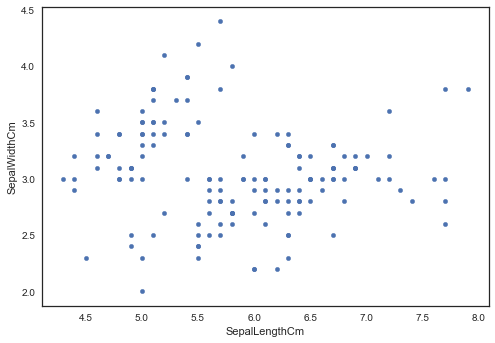

In [11]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
# Scatter plots show how much one variable is affected by another, that is why we use it
# "scatter" tells python to scatter the data points
#"SepalLengthCM" and "SepalWidthCm" are the values from the dataset whichare assigned to each axis
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")


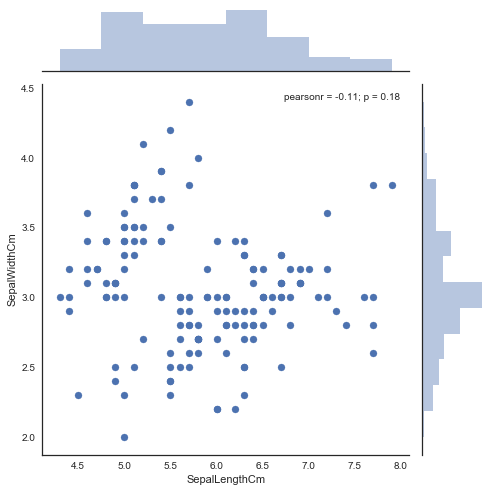

In [13]:


# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
#Size= 7 increases the size of the data points
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=7)




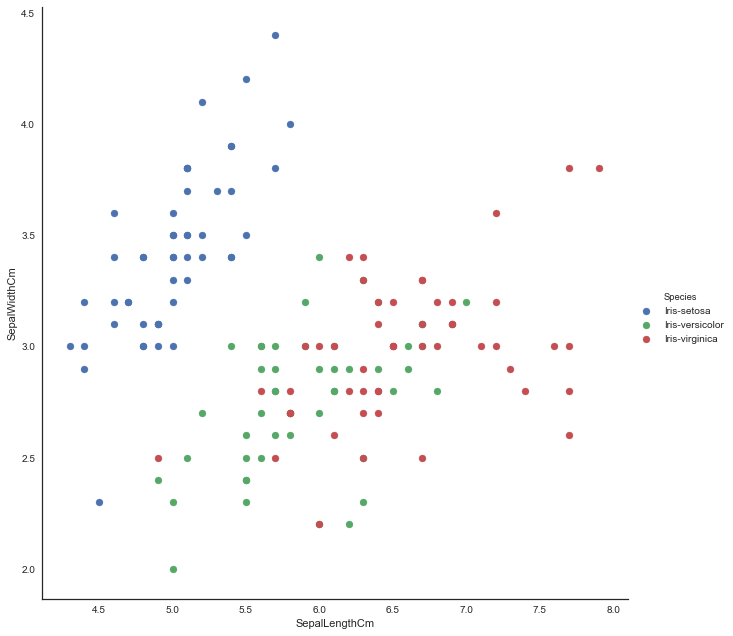

In [14]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
#hue assigns each value under species a specif color
# Default colours are blue, red, green, and yellow
# We increase the size to 9 to make it more visible and comrehensive
sns.FacetGrid(iris, hue="Species", size=9) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()



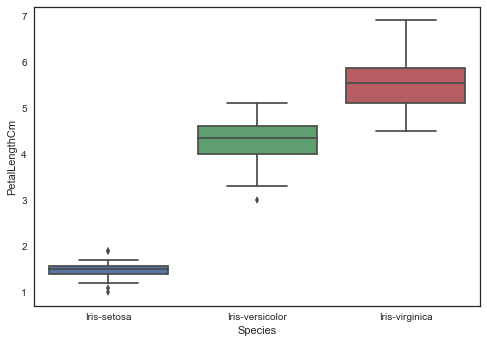

In [15]:
# We can look at an individual feature in Seaborn through a boxplot,
# We use a box plot to display the distribution of data based on the
#minimum, first quartile, median, third quartile, and maximum numbers.
# We set x axis as Species and y axis as PetalLengthCm respectively.
#These are values from data set
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)


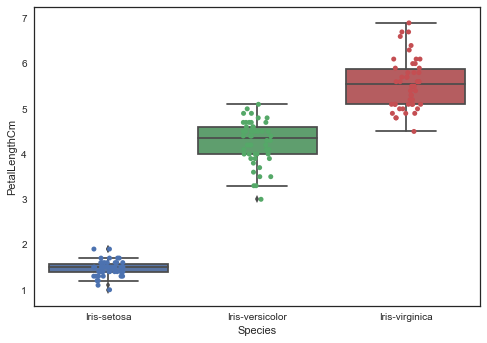

In [17]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#If we dont use jitter we are unable to see the data points
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="blue")



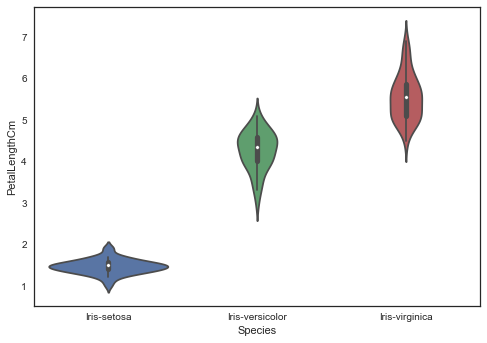

In [20]:


# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
#We set x axis and y axis as species and PetalLength respectively
#I tried to change the original size from 6 to 10, and then from 10 to 1 and there was no effect
#Size does not affect the violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=1)






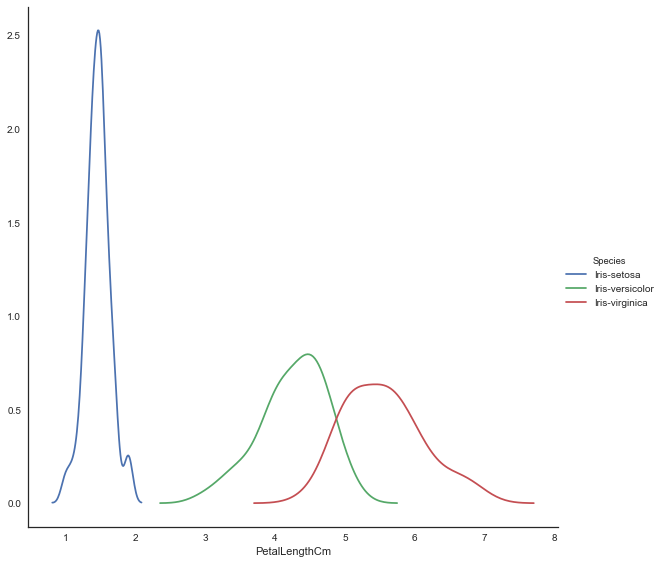

In [21]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
# we set the size to 8 to enlarge the seaborn plot
sns.FacetGrid(iris, hue="Species", size=8) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()


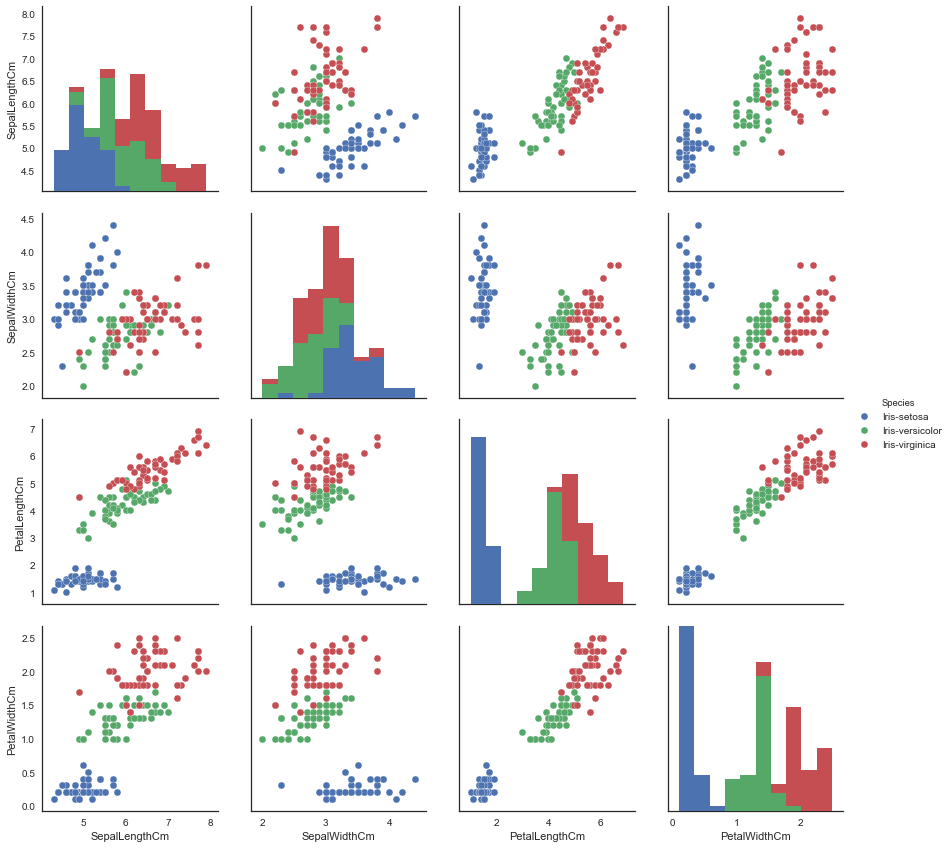

In [13]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
# I tried to set the axis to 0 and 3 and got an error
# Axis must always be equal to 1
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

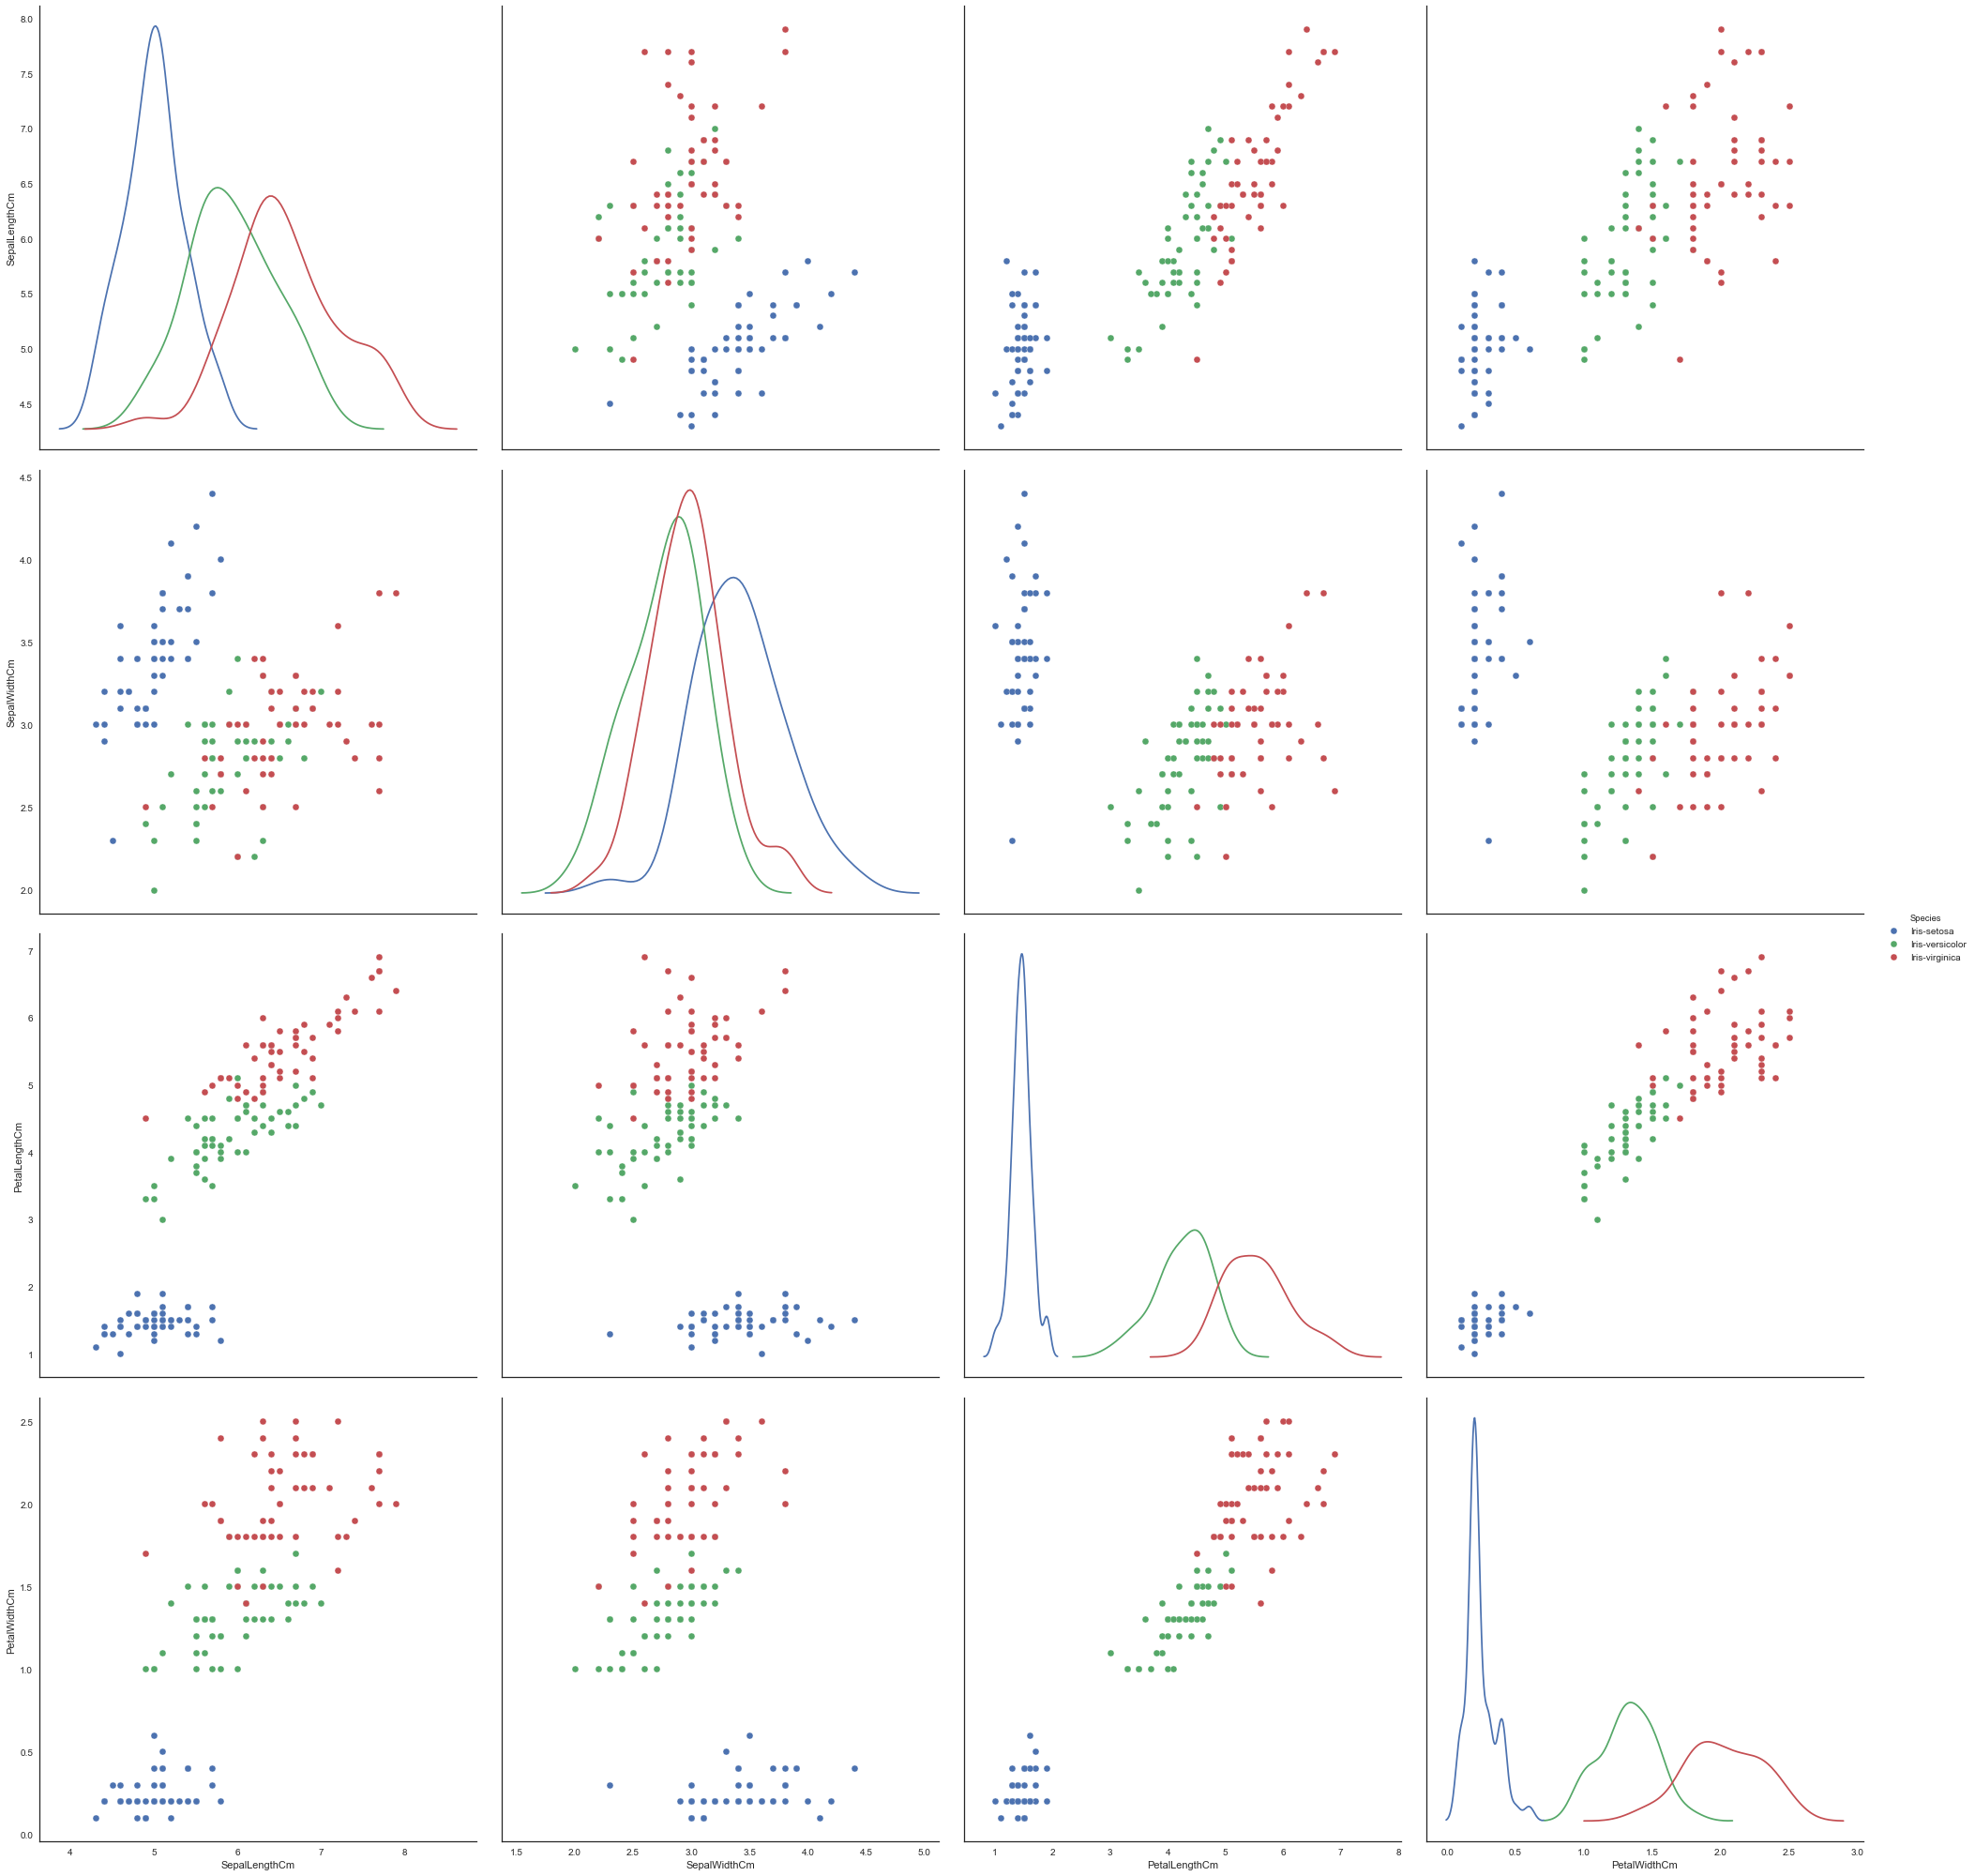

In [29]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
# We set the size to 7 to enlarge it
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=7, diag_kind="kde")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8E206ABE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A8E20B5B00>]], dtype=object)

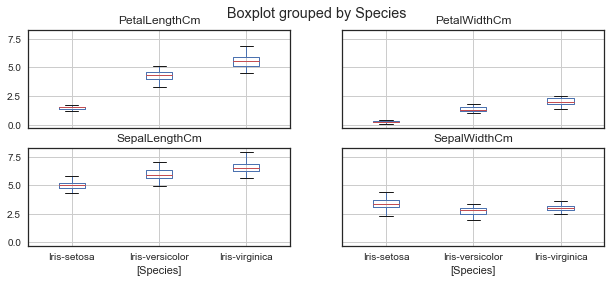

In [22]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
# We set the figsize to 10 and 4 to make the plots smaller
# Axis must remain equal to 1
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 4))


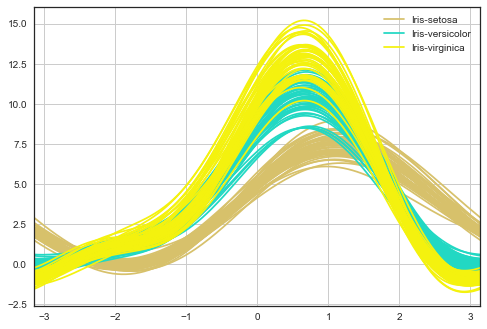

In [32]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
#Axis must remain equal to 1
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")





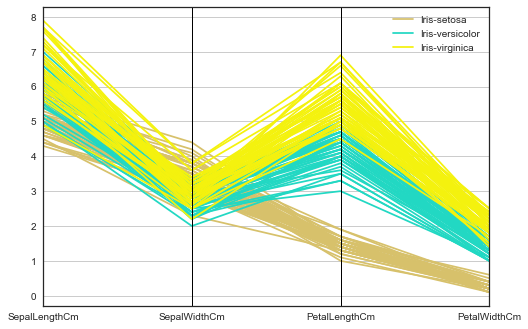

In [17]:


# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")



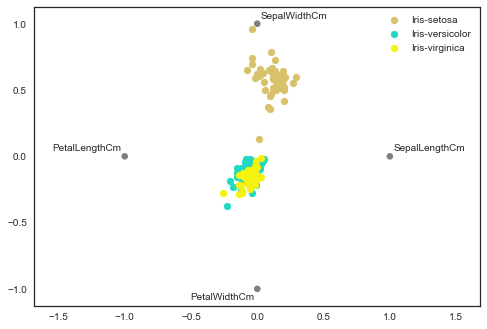

In [18]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
# Axis must remain equal to 1
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")